this notebook is for plotting out graphs and exploring the data

In [1]:
import gc
from tensorflow.keras import backend as K

In [2]:
language = 'ja'
import name_transliteration.filtering as filter
import name_transliteration.cleansing as cleanse
import name_transliteration.model_trainer_and_tester as model_trainer_and_tester

In [3]:
# filter testing and training data
my_filter = filter.Filter(language)
my_filter.filterData("./data/",3)

./data/stream-2021-03-07T03:05:07.831679.gz
./data/stream-2021-01-13T01:21:29.804195.gz
./data/stream-2021-01-13T04:07:46.253913.gz


In [4]:
# instantiate the cleanser
my_cleanser = cleanse.Cleanser()

raw_names = my_filter.getDataFrame()

raw_names["username"] = raw_names["username"].apply(my_cleanser.transformUserName)
raw_names = raw_names[['username','screen_name']]
raw_names.to_csv('raw_names.txt', header=None, index=None, sep='\t', mode='w')

In [5]:

loaded_model = model_trainer_and_tester.ModelTrainerAndTester(
    language=language
)
loaded_model.loadDataParameters()
loaded_model.createDecoderEncoder('model_A')

In [6]:
prob_list = loaded_model.create_probabilities("raw_names.txt")

data is processed
completed prediction iteration: 1 of 28
completed prediction iteration: 2 of 28
completed prediction iteration: 3 of 28
completed prediction iteration: 4 of 28
completed prediction iteration: 5 of 28
completed prediction iteration: 6 of 28
completed prediction iteration: 7 of 28
completed prediction iteration: 8 of 28
completed prediction iteration: 9 of 28
completed prediction iteration: 10 of 28
completed prediction iteration: 11 of 28
completed prediction iteration: 12 of 28
completed prediction iteration: 13 of 28
completed prediction iteration: 14 of 28
completed prediction iteration: 15 of 28
completed prediction iteration: 16 of 28
completed prediction iteration: 17 of 28
completed prediction iteration: 18 of 28
completed prediction iteration: 19 of 28
completed prediction iteration: 20 of 28
20000 predictions completed


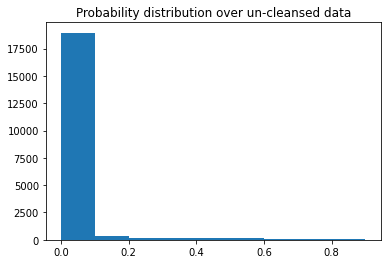

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(np.array(prob_list), bins=np.arange(10)/10)
plt.title('Probability distribution over un-cleansed data')
plt.show()

In [19]:
loaded_model.model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 27)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 5071)] 0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 256), (None, 290816      input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 256),  5455872     input_2[0][0]                    
                                                                 lstm[0][1]                   

In [24]:
loaded_model.predict("yuzu")

('ゆず\n', 0.6737388)

In [13]:
cleansed_data = my_cleanser.cleanseData(my_filter.getDataFrame(), edit_threshold=0)

In [14]:
cleansed_data = cleansed_data[['username','screen_name']]
cleansed_data.to_csv('cleansed_names.txt', header=None, index=None, sep='\t', mode='w')

In [16]:
prob_list_cleansed = loaded_model.create_probabilities("cleansed_names.txt")

data is processed
completed prediction iteration: 1 of 1
846 predictions completed


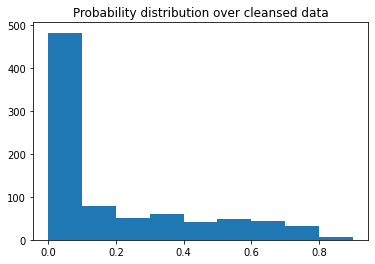

In [25]:
plt.hist(np.array(prob_list_cleansed), bins=np.arange(10)/10)
plt.title('Probability distribution over cleansed data')
plt.show()